<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Cоотношение-типов-заведений-по-количеству" data-toc-modified-id="Cоотношение-типов-заведений-по-количеству-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cоотношение типов заведений по количеству</a></span></li><li><span><a href="#Cоотношение-количества-сетевых-и-несетевых-заведений" data-toc-modified-id="Cоотношение-количества-сетевых-и-несетевых-заведений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cоотношение количества сетевых и несетевых заведений</a></span></li><li><span><a href="#Виды-заведений-с-сетевым-распространением" data-toc-modified-id="Виды-заведений-с-сетевым-распространением-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Виды заведений с сетевым распространением</a></span></li><li><span><a href="#Характерные-черты-сетей" data-toc-modified-id="Характерные-черты-сетей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Характерные черты сетей</a></span></li><li><span><a href="#Соотношение-вида-объекта-количеству-посадочных-мест" data-toc-modified-id="Соотношение-вида-объекта-количеству-посадочных-мест-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Соотношение вида объекта количеству посадочных мест</a></span></li><li><span><a href="#Выделение-улицы-из-столбца-address" data-toc-modified-id="Выделение-улицы-из-столбца-address-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выделение улицы из столбца <code>address</code></a></span></li><li><span><a href="#ТОП-10-улиц-по-количеству-заведений" data-toc-modified-id="ТОП-10-улиц-по-количеству-заведений-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ТОП-10 улиц по количеству заведений</a></span></li><li><span><a href="#Количество-улиц-с-одним-заведением" data-toc-modified-id="Количество-улиц-с-одним-заведением-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Количество улиц с одним заведением</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ рынка общепита Москвы.

**Описание проекта**

На кону многообещающий, но дорогой проект - открытие небольшого, но оригинального кафе в Москве, где гостей должны обслуживать роботы. 
На воплощение проекта в жизнь необходимы инвестиции. Инвесторов интересует текущее положение дел на рынке — надолго ли можно снискать популярность у посетителей, когда все насмотрятся на роботов-официантов?  

**Цель исследования**

Подготовить исследование рынка общественного питания в Москве.


 **Ход исследования**
 
1. Обзор данных.
2. Предобработка данных.
3. Анализ данных.
4. Подготовка презентации.

## Обзор данных 

В этом разделе проведем обзор данных:

1. Выгрузим и познакомимся с данными.
2. Выявим недочеты и проблемы в данных.

Составим первое представление о данных. Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from io import BytesIO
import requests

In [3]:
# зададим параметры отображения
pd.set_option('display.max_colwidth', 0)
pd.options.display.max_columns = None

Познакомимся с данными. Для этого создадим функцию, которая выводит общую информацию о данных, а также проверяет данные на пропуски и дубликаты:

In [4]:
def df_info(df, column):
    print('Познакомимся с данными')
    print('_' * 50, '\n')
    display(df.head(10))
    print()
    print('Посмотрим сводную информация о данных')
    print('_' * 50, '\n')
    print()
    df.info()
    print()
    print("Количество дубликатов:", df.duplicated().sum()) 
    print('_' * 50, '\n')
    print()
    print("Основные статистики количественного столбца", column)
    print('_' * 50, '\n')
    print(df[column].describe())

**Загрузим и познакомимся с данными** 

In [5]:
df_info(df, 'number')

Познакомимся с данными
__________________________________________________ 



,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120



Посмотрим сводную информация о данных
__________________________________________________ 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB

Количество дубликатов: 0
__________________________________________________ 


Основные статистики количественного столбца number
__________________________________________________ 

count    15366.000000
mean     59.547182   
std      74.736833   
min      0.000000    
25%      12.000000   
50%      40.000000   
75%      80.000000   
max      1700.000000 
Name: number, dtype: float64


Все ли рестораны уникальны, нет ли скрытых дубликатов по ID:

In [6]:
if df['id'].nunique() == df['id'].count():
    print('Все заведения имеют уникальный ID')
else:
    print('Осторожно! Есть дубликаты.')

Все заведения имеют уникальный ID


Посмотрим уникальные значения в категориях:

In [7]:
# функция подсчета количества и вывода уникальных значений
def unique_info_columns(df, column):
    print('Количество уникальных объектов:', df[column].nunique())
    print('_' * 50, '\n')
    # количество заведений каждого значения
    print('Первые 20 уникальных значений', column, 'по частоте использования:')
    print()
    print(df[column].value_counts().head(20))

Познакомимся с типами объектов общественного питания:

In [8]:
unique_info_columns(df, 'object_type')

Количество уникальных объектов: 9
__________________________________________________ 

Первые 20 уникальных значений object_type по частоте использования:

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                  856 
буфет                                585 
кафетерий                            398 
закусочная                           360 
магазин (отдел кулинарии)            273 
Name: object_type, dtype: int64


Всего в данных 15366 заведений, посмотрим сколько из них уникальных:

In [9]:
unique_info_columns(df, 'object_name')

Количество уникальных объектов: 10393
__________________________________________________ 

Первые 20 уникальных значений object_name по частоте использования:

Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
Макдоналдс                  122
Бургер Кинг                 122
Домино'с Пицца              86 
Теремок                     84 
Крошка Картошка             82 
Пекарня                     76 
Милти                       65 
Суши Wok                    61 
Буфет                       59 
СТОЛОВАЯ                    52 
Папа Джонс                  50 
Кофе с собой                44 
Школьно-базовая столовая    44 
Чайхона №1                  42 
КАФЕ                        41 
Name: object_name, dtype: int64


Познакомимся с данными о сетевых ресторанах:

In [10]:
unique_info_columns(df, 'chain')

Количество уникальных объектов: 2
__________________________________________________ 

Первые 20 уникальных значений chain по частоте использования:

нет    12398
да     2968 
Name: chain, dtype: int64


In [11]:
unique_info_columns(df, 'address')

Количество уникальных объектов: 9108
__________________________________________________ 

Первые 20 уникальных значений address по частоте использования:

город Москва, Ходынский бульвар, дом 4                                       95
город Москва, Пресненская набережная, дом 2                                  63
город Москва, проспект Мира, дом 211, корпус 2                               60
город Москва, Кировоградская улица, дом 13А                                  53
город Москва, площадь Киевского Вокзала, дом 2                               48
город Москва, улица Земляной Вал, дом 33                                     46
город Москва, Мытная улица, дом 74                                           46
город Москва, улица Новый Арбат, дом 21                                      42
город Москва, улица Ленинская Слобода, дом 26                                41
город Москва, Ярцевская улица, дом 19                                        40
город Москва, Кутузовский проспект, дом 57   

In [12]:
unique_info_columns(df, 'number')

Количество уникальных объектов: 315
__________________________________________________ 

Первые 20 уникальных значений number по частоте использования:

0      1621
40     835 
20     727 
30     685 
10     644 
50     560 
60     472 
80     464 
15     360 
45     360 
100    343 
25     309 
120    301 
48     293 
70     272 
12     270 
35     262 
240    260 
90     254 
4      231 
Name: number, dtype: int64


Проверим данные на наличие дубликатов во всех столбцах кроме `id`

In [13]:
df.loc[:, 'object_name':].duplicated().sum()

82

In [14]:
# удалим эти дубликаты
df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'], inplace=True)

В данных 1621 заведение - 10.5% от общего количества не имеют посадочных мест, что скорее всего соответствует классификации - «нестационарный торговый объект» или НТО - это уличные точки типа: киоски, тележки, палатки, лотки, прицепы, автомагазины и прилавки.
Посмотрим так ли это и проверим их количество в данных.

In [15]:
df[df['number'] == 0]['object_type'].unique()

array(['закусочная', 'предприятие быстрого обслуживания', 'столовая',
       'кафетерий', 'кафе', 'магазин (отдел кулинарии)', 'буфет', 'бар',
       'ресторан'], dtype=object)

Посмотрим, какие это заведения:

In [16]:
df[df['number'] == 0]['object_name'].sort_values().unique()

array(['24 Градуса', '3 Skovorodki', '9bar', 'AGLOMERAT',
       'ALOHA POKE BAR', 'BIBI-ДОНЕР', 'BOKKER', 'Be my pizza', 'Bokker',
       'Bongo coffee', 'Bubble Mania', 'Burger Heroes', 'CIAO PIZZA',
       'CINNABON', 'CITO', 'Camera Obscura', 'Cash&Curry', 'ChopEat',
       'Cinnabon', 'Cofe Mix', 'Coffe Point', 'Coffe in time',
       'Coffe to go', 'Coffe-like', 'CoffeBrain', 'Coffee Good',
       'Coffee Moose', 'Coffee in', 'Coffee moments', 'Coffee port',
       'CoffeeShop', 'Coffey', 'Cofix', 'Craft Station', 'Cream Station',
       'DIM SUM', 'DONER KEBAB', 'DONER ШАУРМА', 'DUCK IT', 'DUCKIT',
       'Dim Sum & Co', 'Dim Sum&Co', 'Dippin Dots', 'Dolce crema',
       'Doner House', 'Doner Kebab', 'Doner Kebab-Куры Гриль', 'Doubl B',
       'Double Pizza', 'DreamWok', 'Dunkin Donuts', 'Eat Market',
       'Family Farm Burgers', 'Fibonacci', 'Fish burger', 'Food Place',
       'Franklins', 'Frenchkiss', 'Fresh Bar', 'Fresh Cacao', 'Fresh bar',
       'Fried chicken', 'Froyolla

Итак, таблица содержит информацию о 15366 объектах общественного питания в Москве. Всего таблица содержит 6 столбцов и, соответственно, 15366 строк. Пропусков и дубликатов в данных не обнаружено. Тип данных в колонках правильный.

Согласно документации к данным:

* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

**Вывод**

В данных обнаружены следующие недочеты:

1. В названиях одних и тех же сетевых заведений используются различные вариации написания: латинские названия и кирилица, а также дополнительные знаки, что плодит сущности. И таких скрытых дубликатов в данных очень много. Очистить все данные от таких дубликатов слишком трудоемко и не входит в задачи исследования. Но в тоже время такие скрытые дубликаты не позволят корректно провести исследование, поэтому обработаем основные заведения - [ТОП-10 сетей общественного питания в Москве](https://www.rbc.ru/society/13/03/2022/622c9f5a9a794746808fd1ee) и [ТОП-15 сетей общепита в России](https://marketmedia.ru/media-content/top-15-setey-obshchestvennogo-pitaniya-v-rossii/) приведем к единому виду. 

2. В числе заведений, относящихся к типу «нестационарный торговый объект» с нулевым количеством посадочным мест попали и сетевые заведения как `KFC`, `ДОДО пицца`, `Burger King` и многие другие. То есть нули не везде означают отсутсвие посадочнх мест. Возможно, они стали следствием пропусков в данных, когда информация о количестве посадочных мест отсутствовала в данных. Такие погрешности в данных могут привести к искажению реального состояния дел, но в рамках данного проекта нет цели исправить все недочеты данных. Будем иметь в виду этот недочет при дальнейшем анализе. 
3. Для удобства поиска дубликатов и восприятия информации приведем к нижнему регистру значения колонок `object_name` и `address`. После этого проверим данные на неявные дубликаты.
4. Дадим колонке number более понятное название - `number_of_seats`.
5. Для удобства восприятия информации заменим название типа объекта `предприятие быстрого обслуживания` на более привычное и короткое `fast food`, а `магазин (отдел кулинарии)` на `отдел кулинарии`.

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

## Предобработка данных

1. Дадим колонке `number` более понятное название;
2. Приведем значения в столбцах `object_name`, `address` к нижнему регистру;
3. Заменим название типа объекта на более привычное и короткое;
4. Скрытые дубликаты названий заведений приведем к единому виду;
5. Найдем и удалим скрытые дубликаты.

**1. Дадим колонке `number` более понятное название:**

In [17]:
# переименуем колонку
df = df.rename(columns = {'number':'number_of_seats'})

**2. Приведем значения в столбцах `object_name`, `address` к нижнему регистру**

In [18]:
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number_of_seats
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


**3. Заменим название типа объекта `предприятие быстрого обслуживания` на более привычное и короткое `fast food`, а `магазин (отдел кулинарии)` на `отдел кулинарии`**

In [19]:
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'fast food')
df['object_type'] = df['object_type'].str.replace("магазин (отдел кулинарии)", 'отдел кулинарии', regex=False)
# проверим корректность замены
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'fast food', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'отдел кулинарии'], dtype=object)

**4. Наведем порядок хотя бы в основных сетевых названиях:**

Поиск и корректировка скрытых дубликатов в названиях заведений.

In [20]:
# поиск дубликатов названий
list(df[df['object_name'].str.contains('kfc')]['object_name'].unique())

['kfc',
 'кафе «kfc»',
 'ростикс kfc',
 'закусочная kfc',
 'kfc волгоградский',
 'кафе kfc',
 'пбо «kfc покрышкина»',
 'kfc.',
 'предприятие быстрого обслуживания «kfc»',
 'закусочная «kfc»',
 'ресторан kfc',
 'пбо «kfc»',
 'ресторан «kfc»',
 'fridays kfc',
 'ресторан быстрого питания kfc']

Создадим словарь с дублирующимися названиями заведений из ТОП-20 крупнейших сетей общепита России:

In [21]:
duplicated_names = {
    'burger king':['ресторан «бургер кинг»', 'бургер кинг', 'предприятие быстрого обслуживания «бургер кинг»', 
                   'бургер кинг burger king', 'кафе бургер кинг', 'закусочная «бургер кинг»', 'кафе-закусочная «бургер кинг»', 
                   'кафе «бургер кинг»', 'бурген кинг', 'burgerking'],
    'mcdonalds':['макдоналдс', 'ресторан «макдоналдс»', 'предприятие быстрого обслуживания «макдоналдс»', 'москва - макдоналдс', 
                 'кафе макдоналдс', 'кафе «макдоналдс»', 'ресторан«макдоналдс»'],
    'kfc':['кафе «kfc»', 'ростикс kfc', 'закусочная kfc', 'kfc волгоградский', 'кафе kfc', 'пбо «kfc покрышкина»', 'kfc.', 
           'предприятие быстрого обслуживания «kfc»', 'закусочная «kfc»', 'ресторан kfc', 'пбо «kfc»', 'ресторан «kfc»', 
           'ресторан быстрого питания kfc', 'кфс амрест', 'ресторан кфс'],
    'додо пицца':['пиццерия «додо пицца»','предприятие быстрого обслуживания «додо пицца»', 'додопицца', 'пиццерия «додо»', 
                'пицца «додо»', 'до до пицца', 'do do пицца'],
    'шоколадница':['шоколадница кофе хаус', 'кофейня «шоколадница»', 'кафе «шоколадница»', 'кофейня шоколадница', 
                 'шоколадница экспресс', 'шоколадница кофемания'],
    'dominos pizza':['domino-s pizza', "домино'с пицца domino,s pizza", "домино'с пицца", "пиццерия «домино'с пицца»", 
                     "предприятие быстрого обслуживания «домино'с пицца»", "ресторан «домино'с пицца»", "кафе «домино'с пицца»", 
                     'доминос пицца'],
    'теремок':['предприятие быстрого обслуживания «теремок»', 'теремок инвест', 'кафе «теремок»', 'кафе теремок', 
               'ресторан теремок', 'теремок-инвест', 'закусочная «теремок»', 'пбо «теремок»'],
    'крошка-картошка':['крошка картошка', 'предприятие быстрого обслуживания «крошка картошка»', 'кафе «крошка-картошка»', 
                     'закусочная «крошка картошка»', 'кафе «крошка картошка»', 'ресторан быстрого питания «крошка картошка»', 
                     'предприятие быстрого питания «крошка картошка»', 'крошкакартошка'],
    'му-му':['кафе «му му»', 'кафе му му', 'му-му', 'кафе «му-му»', 'кафе му-му', 'кафе быстрого питания му-му'],
    'cofix':['кофейня «cofix»', 'кофейня cofix', 'кофикс', 'предприятие быстрого обслуживания «кофикс»', 'кофейня кофикс'],
    'стардогs':['стардогс', 'стардогs и шаурма', 'стардогс стардогs', 'закусочная «стардогs»'],
    'starbucks':['старбакс starbucks', 'кафе «starbucks»', 'кафе starbucks', 'starbucks кофе', 
                 'starbucks, старбакс кофе', 'starbucks старбакс', 'starbucks coffee', 'кофемания starbucks', 
                 'кофейня «старбакс»', 'старбакс', 'кафе «старбакс»', 'кафе «кофейня старбакс»', 'кофейня «старбакс кофе»', 
                 'старбакс кофе'],
    'subway':['кафе «subway»', 'сабвей subway', 'сабвей', 'сабвэй',  'кафе «сабвей» старбакс', 'кафе «сабвэй»', 'кафе сабвей'],
    'pizza hut':['пицца хат', 'кафе «пицца хат»', 'закусочная «пицца хат»', 'ресторан «пицца хат»', 'пиццерия «пицца хат»', 
                 'пице хат'],
    'coffee like':['coffe-like', 'кафе «лайк»'],
    'baskin robbins':['баскин роббинс', 'кафе «баскин роббинс»'],
    'papa johns':['папа джонс', 'кафе «папа джонс»', 'пиццерия «папа джонс»', 'пицерия папа джонс', 'папа джонс пицца', 
                  'пицерия «папа джонс»',  'пиццерия папа джонс'],
    'cinnabon':['кафе cinnabo', 'кафе «cinnabon»', 'cinnabon2', 'синнабон'],
    'black star burgers':['black star burger prime', 'black star burger', 'блэк стар бургер'],
    'bb&burgers':['bb энд burger', 'bbburgers', 'ресторан «bb burgers»', 'bb & burgers'],
    'якитория':['ресторан «якитория»', 'кафе «якитория»', 'кафе якитория'],
    'fridays':['ресторан tgi friday s', 'tgi fridays', 'fridays', 'ресторан «tgi fridays»', 'фрайдис'],
    'корчма тарас бульба':['ресторан «корчма тарас бульба»', 'корчма «тарас бульба»', 'корчматарас бульба', 'корчма«тарас бульба»']
}   

Функция для замены дублирующих названий на единое для сети:

In [22]:
def replace_duplicated_names(row):
    for correct_name, wrong_names in duplicated_names.items():
        if row in wrong_names:
            return correct_name
    return row

Применим функцию

In [23]:
df['object_name'] = df['object_name'].apply(replace_duplicated_names)

Проверим корректность замены на нескольких сетях:

In [24]:
print(list(df[df['object_name'].str.contains('kfc')]['object_name'].unique()))
print(list(df[df['object_name'].str.contains('макдональд')]['object_name'].unique()))
print(list(df[df['object_name'].str.contains('додо')]['object_name'].unique()))

['kfc', 'fridays kfc']
[]
['додо пицца']


Благодаря приведению значений к нижнему регистру и единообразию названия можно проверить данные на неявные дубликаты. Посмотрим сколько совпадений по названию и адресу заведения:

In [25]:
print('Количество дубликатов:', df.duplicated(subset=['object_name', 'address']).sum())
display(df[df.duplicated(subset=['object_name', 'address'])])

Количество дубликатов: 162


,id,object_name,chain,object_type,address,number_of_seats
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",12
579,149227,общественное питание,нет,столовая,"город москва, павелецкая площадь, дом 1",70
580,149205,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",39
...,...,...,...,...,...,...
15241,210885,kfc,да,fast food,"город москва, манежная площадь, дом 1, строение 2",41
15253,214872,чайхона №1,да,кафе,"город москва, кутузовский проспект, дом 57",0
15357,218692,шоколадница,да,кафе,"город москва, площадь джавахарлала неру, дом 1",30
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20


Это 1.6% от всех данных, тем не менее они будут вносить коррективы в исследование, поэтому удалим их.

In [26]:
df.drop_duplicates(subset=['object_name', 'address'], inplace=True)

**Вывод**

Исходные данные далеки от идеала, тем не менее в процессе предобработки был наведен некий порядок. Можно переходить к анализу данных.

## Анализ данных

В данном разделе будут сделаны следующие шаги:

1. Исследуем и визуализируем соотношение типов объектов общественного питания по количеству.
2. Исследуем и визуализируем соотношение сетевых и несетевых заведений по количеству. 
3. Найдем вид объекта общественного питания, для которого характерно сетевое распространение.
4. Ответим на вопрос: 
   Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Найдем вид объекта, который в среднем предоставляет самое большое количество посадочных мест. Построим графики.
6. Выделим в отдельный столбец информацию об улице из столбца address .
7. Построим график топ-10 улиц по количеству объектов общественного питания. Для этого воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?
8. Найдем количество улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

### Cоотношение типов заведений по количеству

In [27]:
# сгруппируем данные по типу заведения
ratio_of_types = df.groupby('object_type')['id'].count().reset_index()
ratio_of_types = ratio_of_types.rename(columns={'id':'count'}).sort_values(by='count', ascending=False)
ratio_of_types

,object_type,count
4,кафе,5983
8,столовая,2572
7,ресторан,2263
0,fast food,1883
1,бар,849
2,буфет,565
5,кафетерий,391
3,закусочная,344
6,отдел кулинарии,272


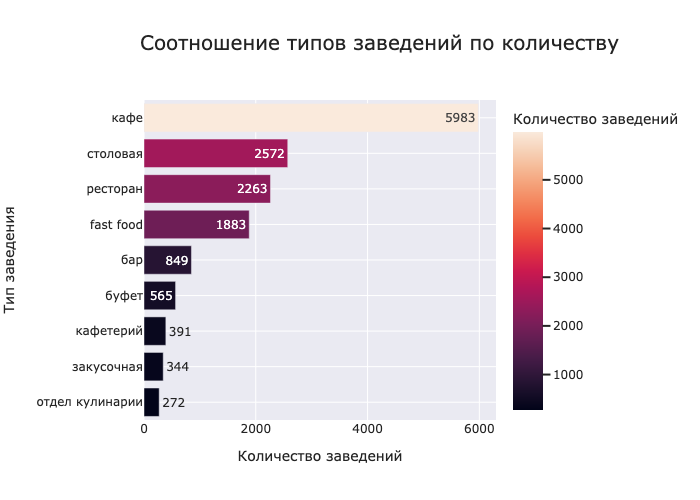

In [28]:
# отобразим на графике виды заведений с сетевым распределнием
fig = px.bar(ratio_of_types.sort_values(by='count', ascending=True),
             x='count', 
             color='count',
             y='object_type', 
             text='count',
             title='Cоотношение типов заведений по количеству',
             template='seaborn',   
             labels={'object_type':'Тип заведения',
                     'count':"Количество заведений"},
            )

fig.update_layout(title={'font':dict(size=20), 'x':0.2})

fig.show("png")

Посмотрим к какому типу заведения относится, например, "KFC"  и "burger king":

In [29]:
print("Типы заведений для KFC:", df.query('object_name == "kfc"')['object_type'].unique())
print("Типы заведений для burger king:", df.query('object_name == "burger king"')['object_type'].unique())

Типы заведений для KFC: ['ресторан' 'fast food' 'кафе' 'закусочная']
Типы заведений для burger king: ['ресторан' 'fast food' 'бар' 'кафе' 'закусочная']


**Вывод**

Тройка лидеров среди типов заведений:

   1. кафе - 5 983 заведения,
   2. столовая - 2 572 заведения,
   3. ресторан - 2 263 заведения. 
    
Но в данных нет единого типа для одной сети заведений. Как мы видим, KFC, наприммер, относится сразу в четырех типам, а "burger king" и вовсе к пяти типам. 

### Cоотношение количества сетевых и несетевых заведений

In [30]:
# сгруппируем данные по сети
chain_count =  df.groupby('chain')['id'].count().reset_index()
chain_count = chain_count.rename(columns={'id':'count'}).sort_values(by='count', ascending=False)
chain_count

,chain,count
1,нет,12199
0,да,2923


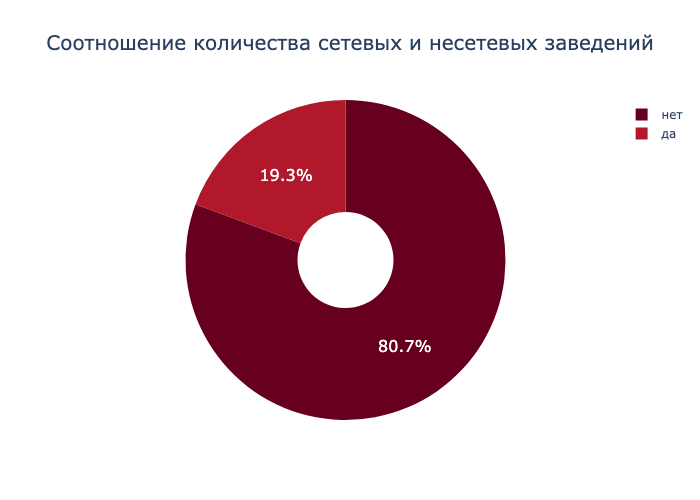

In [31]:
# построим круговую диаграмму
fig = px.pie(
    chain_count, 
    values='count', 
    names='chain',
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=.3,
    title="Соотношение количества сетевых и несетевых заведений",
    labels={'chain':'Является ли объект сетевым',
                     'count':"Количество заведений"}
)
fig.update_layout(title={'font':dict(size=20), 'x':0.5})
fig.update_traces(textfont_size=16)

fig.show("png")

Посмотрим все ли заведения одной сети отмечены как сеть, например, "KFC"  и "burger king":

In [32]:
print("Отметки о сети для KFC:", df.query('object_name == "kfc"')['chain'].unique())
print("Отметки о сети для burger king:", df.query('object_name == "burger king"')['chain'].unique())

Отметки о сети для KFC: ['да' 'нет']
Отметки о сети для burger king: ['нет' 'да']


**Вывод**

По исходным данным основная часть заведений не является сетевыми - 80.7%, сетевых заведений в 4 раза меньше.
    
Но невозможно не отметить тот факт, что в данных нет порядка и единого регистра данных о сети, поэтому разные заведения одной сети одновременно попадают в обе группы.

### Виды заведений с сетевым распространением

In [33]:
# соберем данные по сети и видам заведений
chain_object_type = (
    df
    .pivot_table(index='object_type', 
                 values='id', 
                 columns='chain', 
                 aggfunc='count')
    .rename(columns={'да':'chain_yes', 
                     'нет':'not_chain'})
    .sort_values(by='chain_yes', ascending=False)
    .reset_index()
)

chain_object_type

chain,object_type,chain_yes,not_chain
0,кафе,1376,4607
1,fast food,781,1102
2,ресторан,533,1730
3,отдел кулинарии,78,194
4,закусочная,56,288
5,кафетерий,50,341
6,бар,37,812
7,буфет,9,556
8,столовая,3,2569


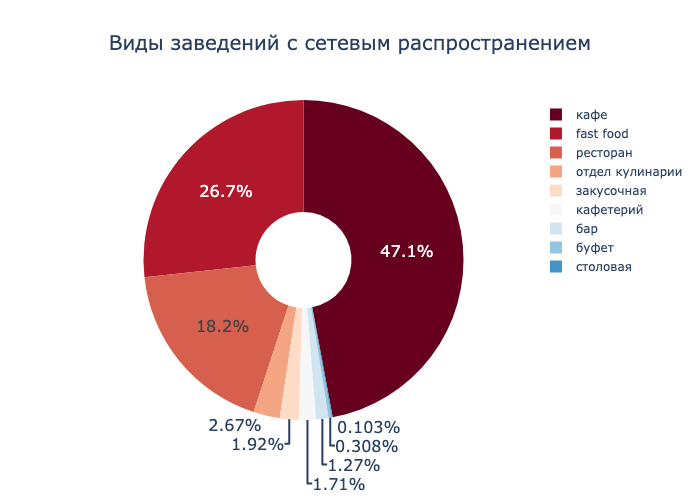

In [34]:
# построим круговую диаграмму
fig = px.pie(
    chain_object_type, 
    values='chain_yes', 
    names='object_type',
    hole=.3,
    color_discrete_sequence=px.colors.sequential.RdBu,
    title="Виды заведений с сетевым распространением",
    labels={'object_type':'Вид заведения ',
            'chain_yes':"Количество заведений ",
           }
)
fig.update_layout(title={'font':dict(size=20), 'x':0.5})
fig.update_traces(textfont_size=16)

fig.show("png")

**Вывод**

Тройка лидеров среди всех видов сетевых заведений:
   1. кафе - 1376 заведений, что составляет 47.1% от всех сетевых объектов,
   2. fast food - 781 заведения и 26.7% от всех сетей,
   3. ресторан - 533 заведения и 18.2%.
   
На долю этих трех видом общепита приходится 92% всего сетевого рынка.

### Характерные черты сетей

Посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [35]:
# посмотрим на разброс значений в количестве посадочных мест
df['number_of_seats'].describe()

count    15122.000000
mean     60.023608   
std      75.070197   
min      0.000000    
25%      14.000000   
50%      40.000000   
75%      80.000000   
max      1700.000000 
Name: number_of_seats, dtype: float64

In [36]:
# посмотрим данные о заведениях с большим количеством посадочных мест
df.query('number_of_seats > 800')

,id,object_name,chain,object_type,address,number_of_seats
2313,26560,ресторан «альфа»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корпус а",1040
3686,27026,рум сервис,нет,ресторан,"город москва, площадь европы, дом 2",1200
4480,27024,рум сервис,нет,ресторан,"город москва, кутузовский проспект, дом 2/1, строение 1",1200
8148,80291,банкетный зал шелк,нет,ресторан,"город москва, большой саввинский переулок, дом 12, строение 10г",1500
8345,27750,столовая-буфет,нет,столовая,"город москва, улица волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,нет,столовая,"город москва, проспект вернадского, дом 84, строение 1",1288
9955,171116,eataly,нет,ресторан,"город москва, киевская улица, дом 2",920
12723,199696,arena by soho family,нет,бар,"город москва, кутузовский проспект, дом 36, строение 11",1700


В основном это все-таки не сети, а большие рестораны и столовые. Но посмотрим на примере двух крупных сетей Mcdonalds и KFC каков разброс количества посадочных мест в сетевых структурах.

In [37]:
# статистики по Mcdonalds и KFC
print("Cтатистики посадочным местам в Mcdonalds")
print(df.query('object_name == "mcdonalds"')['number_of_seats'].describe())
print()
print("Cтатистики посадочным местам в KFC")
print(df.query('object_name == "kfc"')['number_of_seats'].describe())

Cтатистики посадочным местам в Mcdonalds
count    167.000000
mean     89.514970 
std      74.292799 
min      0.000000  
25%      44.500000 
50%      79.000000 
75%      114.000000
max      580.000000
Name: number_of_seats, dtype: float64

Cтатистики посадочным местам в KFC
count    184.000000
mean     55.864130 
std      45.356367 
min      0.000000  
25%      30.000000 
50%      49.000000 
75%      80.000000 
max      400.000000
Name: number_of_seats, dtype: float64


Количество посадочных мест в сетевых заведения имеет большой разброс значений, поэтому в расчетах будем смотреть медианное количество посадочных мест, посколько оно менее восприимчиво к выбросам.

In [38]:
# соберем дынные по характеристике сетевых заведений
character_of_chain = (
    df.query('chain == "да"')
    .groupby('object_name')
    .agg({'id':'count', 
          'number_of_seats':'median'})
    .rename(columns={'id':'count_of_objects', 
                     'number_of_seats':'median_number_of_seats'})
    .sort_values(by='count_of_objects', 
                 ascending=False)
    
)
character_of_chain

,count_of_objects,median_number_of_seats
object_name,,
шоколадница,180,50.0
kfc,180,49.0
mcdonalds,167,79.0
burger king,157,45.0
теремок,108,25.0
...,...,...
каффе «wokker»,1,87.0
кафе-пекарея «волконский»,1,3.0
кафе штолле,1,15.0


Посмотрим есть ли среди сетевых заведений взаимосвязь между количеством заведений в сети и количеством посадочных мест.

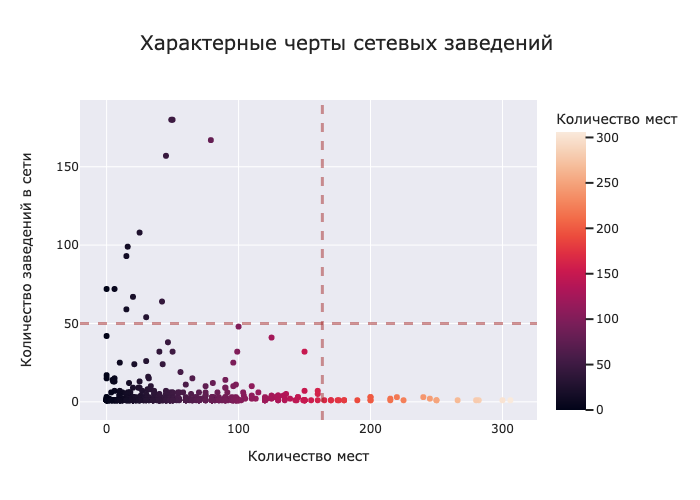

In [39]:
# построим пузырьковую диаграмму
fig = px.scatter(character_of_chain,
           x='median_number_of_seats',
           y='count_of_objects',
           template='seaborn',
           color='median_number_of_seats',
           title="Характерные черты сетевых заведений",      
           labels={'count_of_objects':'Количество заведений в сети ',
            'median_number_of_seats':"Количество мест"}      
          )
# проведем линию - границу 95 перцентиля по количеству посадочнх мест
fig.add_vline(x=np.percentile(character_of_chain['median_number_of_seats'], 95), 
              line_width=3, 
              line_dash="dash", 
              line_color="brown")
# проведем линию - границу 95 перцентиля по количеству заведений
fig.add_hline(y=50, line_width=3, line_dash="dash", 
              line_color="brown")
# центруем заголовок
fig.update_layout(title={'font':dict(size=20), 'x':0.2})

fig.show("png")

**Вывод**

График наглядно демонстрирует, что для сетевых заведений в 95% данных характерно:
  1. малое количество заведений в сети - не более 25,
  2. довольно-таки большое количество посадочных мест - до 160 мест.

### Соотношение вида объекта количеству посадочных мест

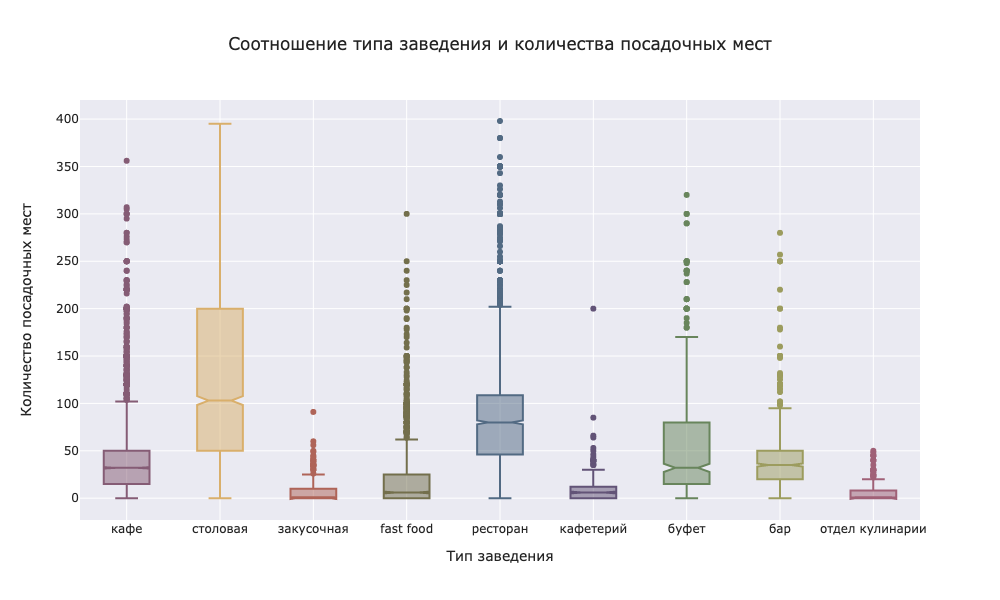

In [40]:
# для визуализации распределения среднего количества посадочных мест построим box
fig = px.box(df.query('number_of_seats < 400'), 
             x='object_type', 
             y='number_of_seats',
             color='object_type',
             template='seaborn',
             title="Соотношение типа заведения и количества посадочных мест",
             labels={'object_type':'Тип заведения',
                     'number_of_seats':"Количество посадочных мест"},
             color_discrete_sequence=px.colors.qualitative.Antique,
            # ['#b63544', 'red', 'green', 'blue', 'black', 'yellow', 'orange', 'purple' , 'pink'],
             notched=True,
            )
            
fig.update_layout(autosize=False,
                  showlegend=False,
                  width=1000,
                  height=600)

fig.show("png")

Поскольку ранее мы выяснили, что распределение данных о количестве посадочных мест имеет большие выбросы, то среднее количество будем рассчитывать через медиану.

In [41]:
# соберем данные о соотношении видов объектов и среднем количестве посадочных мест в этих объектах
(
    df
    .pivot_table(index='object_type', 
                 values='number_of_seats', 
                 aggfunc='median')
    .sort_values(by='number_of_seats', 
                 ascending=False)
    .reset_index()
)


,object_type,number_of_seats
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,32
5,fast food,6
6,кафетерий,6
7,закусочная,0
8,отдел кулинарии,0


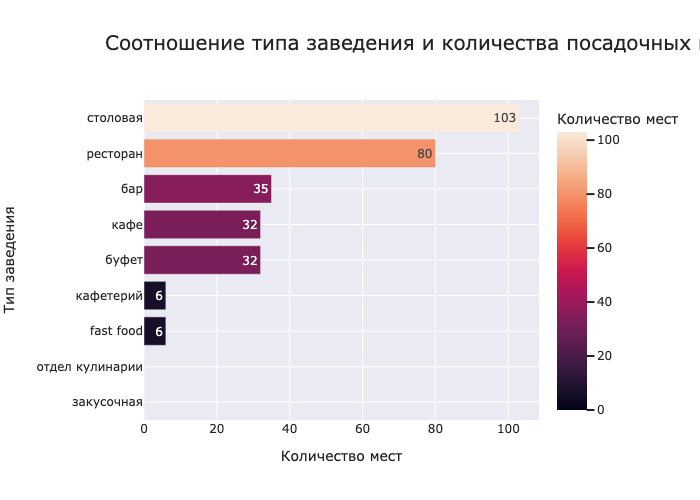

In [42]:
# отобразим на графике соответствие типа заведения и среднего количества посадочных мест 
fig = px.bar(
    df
    .pivot_table(index='object_type', 
                 values='number_of_seats', 
                 aggfunc='median')
    .sort_values(by='number_of_seats')
    .reset_index(),
    x='number_of_seats', 
    y='object_type', color='number_of_seats',
    title='Cоотношение типа заведения и количества посадочных мест',
    text='number_of_seats',
    template='seaborn',
    labels={'object_type':'Тип заведения',
            'number_of_seats':"Количество мест"}
            )

fig.update_layout(title={'font':dict(size=20), 'x':0.15})

fig.show("png")

**Вывод**

Лидеры среди типов заведений по количеству посадочных мест:

  1. столовая - 103 посадочных места,
  2. рестораны - 80 посадочных мест.
    
Такие типы заведений как буфет, кафе и бар в среднем предоставляют 32-35 посадочных мест. 

### Выделение улицы из столбца `address`

Так как [Зеленоград является административным округом Москвы - ЗелАО](https://translated.turbopages.org/proxy_u/en-ru.ru.b357c5a9-62de6b4b-fe12eb78-74722d776562/https/en.wikipedia.org/wiki/Zelenograd), то в рамках классификации выделим его как отдельную улицу для дальнейшего анализа. 

In [43]:
# создадим список с ключевыми словами для поиска и выделения улицы
street_types = ['ул', 
                'улица', 
                'переулок', 
                'проспект',
                'квартал',
                'проезд', 
                'линия',
                'площадь',
                'бульвар',
                'квартал',
                'тупик',
                'шоссе', 
                'набережная',  
                'аллея',
                'километр',
                'посёлок',
                'зеленоград',
                'капотня',
                'село',
                'поселок'
                'деревня',
                'поселение',
                'территория',
                'просек',
                'микрорайон'
               ]

In [44]:
df.head()

,id,object_name,chain,object_type,address,number_of_seats
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [45]:
def get_street(address):
    '''
    функция разделит адрес на части по запятой,
    сравнит каждую часть на вхождение ключевого слова из списка street_types в эту часть
    и вернет ту часть адреса, которая содержит ключевые слова
    '''
    for part_of_address in address.split(', '):
        for type in street_types:
            if type in part_of_address:
                return part_of_address

# применим функцию
df['street'] = df['address'].apply(get_street)

In [46]:
# посмотрим на обновленный датасет
df.head()

,id,object_name,chain,object_type,address,number_of_seats,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [47]:
# проверим данные на возможные пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15122 entries, 0 to 15364
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               15122 non-null  int64 
 1   object_name      15122 non-null  object
 2   chain            15122 non-null  object
 3   object_type      15122 non-null  object
 4   address          15122 non-null  object
 5   number_of_seats  15122 non-null  int64 
 6   street           15122 non-null  object
dtypes: int64(2), object(5)
memory usage: 945.1+ KB


### ТОП-10 улиц по количеству заведений

In [48]:
# соберем таблицу с данными данными об улицах и количестве заведений на них
streets_with_count_objects = (
    df
    .pivot_table(index='street', 
                 values='object_name', 
                 aggfunc='count')
    .rename(columns={'object_name':'object_count'})
    .sort_values(by='object_count', 
                 ascending=False)
    .reset_index()
)

# выведем ТОП-10 улиц с максимальным количеством заведений
streets_with_count_objects.head(10)

,street,object_count
0,город зеленоград,230
1,проспект мира,196
2,профсоюзная улица,179
3,ленинградский проспект,171
4,пресненская набережная,165
5,варшавское шоссе,162
6,ленинский проспект,148
7,поселение сосенское,137
8,проспект вернадского,126
9,кутузовский проспект,112


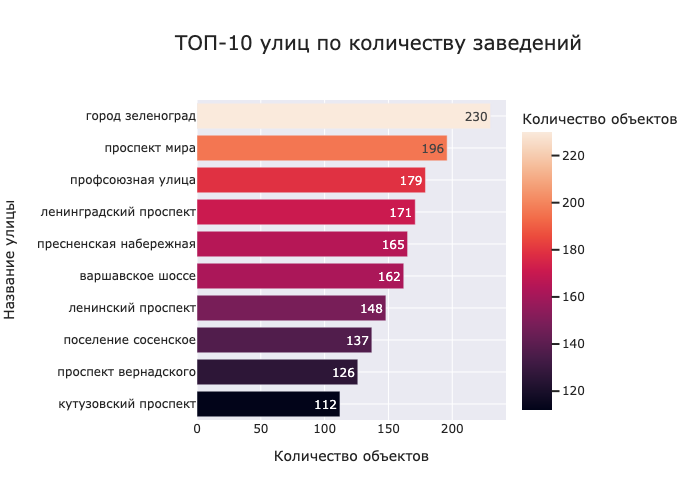

In [49]:
# построим график ТОП-10 улиц по количеству заведений
fig = px.bar(
    streets_with_count_objects
    .head(10)
    .sort_values(by='object_count')
    .reset_index(),
    x='object_count', 
    y='street', 
    color='object_count',
    title='ТОП-10 улиц по количеству заведений',
    text='object_count',
    template='seaborn', 
    labels={'object_count':'Количество объектов',
            'street':"Название улицы"}
)

fig.update_layout(title={'font':dict(size=20), 'x':0.25})

fig.show("png")

Воспользуемся внешним источником, чтобы идентифицировать районы Москвы по этим улицам:

In [50]:
# выгрузим данные о районах
spreadsheet_id = '16u6m4PrWq3NceluYZOumcXsYLWcMgbsB8on5SKf3z8c'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

moscow_streets_and_districs = pd.read_csv(BytesIO(r.content))
# приведем к единообразию название столбца street 
moscow_streets_and_districs = moscow_streets_and_districs.rename(columns={'streetname':'street'})
# для удобства приведем нужные столбцы к нижнему регистру
moscow_streets_and_districs['street'] = moscow_streets_and_districs['street'].str.lower()
moscow_streets_and_districs['area'] = moscow_streets_and_districs['area'].str.lower()

moscow_streets_and_districs.head()

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,пресненский район
1,улица гашека,17,ЦАО,пресненский район
2,большая никитская улица,17,ЦАО,пресненский район
3,глубокий переулок,17,ЦАО,пресненский район
4,большой гнездниковский переулок,17,ЦАО,пресненский район


In [51]:
# соединим таблицу streets_with_count_objects и moscow_streets_and_districs
top_object_count_streets_and_area = (
    streets_with_count_objects.head(10)
    .merge(moscow_streets_and_districs[['street', 
                                        'area']], 
           on='street', 
           how='left')
)

top_object_count_streets_and_area.sort_values(by='object_count', ascending=False).head()

,street,object_count,area
0,город зеленоград,230,район крюково
2,город зеленоград,230,панфиловский район
1,город зеленоград,230,район матушкино-савелки
3,проспект мира,196,алексеевский район
4,проспект мира,196,ярославский район


Поскольку одна улица в Москве в зависимости от номера дома может входить в разные районы, выведем список таких районов.

In [52]:
# посмотрим на все названия районов с ТОП-10 улиц
top_object_count_streets_and_area.pivot_table(index=['street', 'area'])

object_count
street                 area                                     
варшавское шоссе       донской район                162         
                       нагорный район               162         
                       район нагатино-садовники     162         
                       район северное бутово        162         
                       район чертаново северное     162         
                       район чертаново центральное  162         
                       район чертаново южное        162         
                       район южное бутово           162         
город зеленоград       панфиловский район           230         
                       район крюково                230         
                       район матушкино-савелки      230         
кутузовский проспект   район дорогомилово           112         
                       район фили-давыдково         112         
ленинградский проспект район аэропорт               171         
                       район беговой                171         
                       район сокол                  171         
                       хорошевский район            171         
ленинский проспект     донской район                148         
                       ломоносовский район          148         
                       обручевский район            148         
                       район гагаринский            148         
                       район проспект вернадского   148         
                       район теплый стан            148         
                       район тропарево-никулино     148         
                       район якиманка               148         
пресненская набережная пресненский район            165         
проспект вернадского   ломоносовский район          126         
                       район гагаринский            126         
                       район проспект вернадского   126         
                       район раменки                126         
                       район тропарево-никулино     126         
проспект мира          алексеевский район           196         
                       мещанский район              196         
                       останкинский район           196         
                       район марьина роща           196         
                       район ростокино              196         
                       район свиблово               196         
                       ярославский район            196         
профсоюзная улица      академический район          179         
                       обручевский район            179         
                       район коньково               179         
                       район теплый стан            179         
                       район черемушки              179         
                       район ясенево                179

In [53]:
# посмотрим статистику по каждой улице
(
    top_object_count_streets_and_area
    .pivot_table(index='street', 
                 aggfunc={'area':'nunique', 
                          'object_count':'mean'})
    .rename(columns={'area':'area_count'})
    .sort_values(by='object_count', 
                 ascending=False)
    .reset_index()
)

,street,area_count,object_count
0,город зеленоград,3,230
1,проспект мира,7,196
2,профсоюзная улица,6,179
3,ленинградский проспект,4,171
4,пресненская набережная,1,165
5,варшавское шоссе,8,162
6,ленинский проспект,8,148
7,поселение сосенское,0,137
8,проспект вернадского,5,126
9,кутузовский проспект,2,112


In [54]:
# посмотрим ТОП-10 районов с максимальной концентрацией объектов общественного питания
top_object_count_areas = (
    top_object_count_streets_and_area
    .groupby('area')
    .agg({'object_count':'sum'})
    .sort_values(by='object_count', 
                 ascending=False)
    .head(10)
)
top_object_count_areas

,object_count
area,
обручевский район,327
район теплый стан,327
донской район,310
ломоносовский район,274
район проспект вернадского,274
район тропарево-никулино,274
район гагаринский,274
район матушкино-савелки,230
район крюково,230


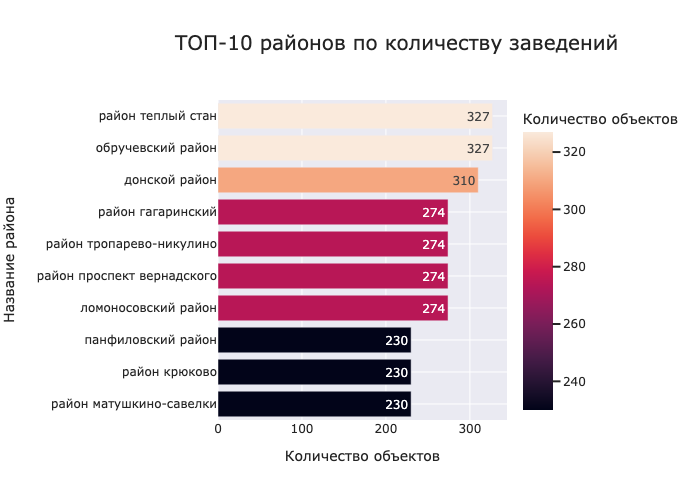

In [55]:
# построим график ТОП-10 районов по количеству заведений
fig = px.bar(
    top_object_count_areas
    .sort_values(by='object_count')
    .reset_index(),
    x='object_count', 
    y='area', 
    color='object_count',
    title='ТОП-10 районов по количеству заведений',
    text='object_count',
    template='seaborn', 
    labels={'object_count':'Количество объектов',
            'area':"Название района"}
)

fig.update_layout(title={'font':dict(size=20), 'x':0.25})

fig.show("png")

In [56]:
print("ТОП-10 улиц с максимальным количеством заведений располагаются в", 
      top_object_count_streets_and_area['area'].count(), 
      'районах')

ТОП-10 улиц с максимальным количеством заведений располагаются в 44 районах


### Количество улиц с одним заведением

In [57]:
# выведем данные о б улицах с одним заведением
(
    streets_with_count_objects
    .query('object_count == 1')
    .head(10)
    .reset_index()
)

,index,street,object_count
0,1334,1-й рижский переулок,1
1,1335,2-я ямская улица,1
2,1336,2-я улица марьиной рощи,1
3,1337,1-й магистральный тупик,1
4,1338,2-я улица бухвостова,1
5,1339,78-й километр московской кольцевой автодороги,1
6,1340,2-й боткинский проезд,1
7,1341,8-й проезд марьиной рощи,1
8,1342,улица медиков,1
9,1343,улица медведева,1


Посчитаем количество улиц с одним заведением общественного питания.

In [58]:
print('Количество улиц с одним заведение общественного питания =', 
      streets_with_count_objects
      .query('object_count == 1')['object_count']
      .count()
     )

Количество улиц с одним заведение общественного питания = 549


In [59]:
# соединим данные об улицах с одним заведением и moscow_streets_and_districs
low_object_count_streets_and_area = (
    streets_with_count_objects
    .query('object_count == 1')
).merge(moscow_streets_and_districs[['street',
                                     'area']],
        on='street', 
        how='left')

low_object_count_streets_and_area.head(10)

,street,object_count,area
0,1-й рижский переулок,1,алексеевский район
1,2-я ямская улица,1,район марьина роща
2,2-я улица марьиной рощи,1,район марьина роща
3,1-й магистральный тупик,1,хорошевский район
4,2-я улица бухвостова,1,район преображенское
5,78-й километр московской кольцевой автодороги,1,NaN
6,2-й боткинский проезд,1,район беговой
7,8-й проезд марьиной рощи,1,район марьина роща
8,улица медиков,1,район царицыно
9,улица медведева,1,район косино-ухтомский


Посмотрим данные по каким улицам не подсоединились

In [60]:
low_object_count_streets_and_area[low_object_count_streets_and_area.area.isna()].head(10)

,street,object_count,area
5,78-й километр московской кольцевой автодороги,1,NaN
18,80-й километр московской кольцевой автодороги,1,NaN
29,65-й километр московской кольцевой автодороги,1,NaN
42,67-й километр московской кольцевой автодороги,1,NaN
55,улица старые кузьминки,1,NaN
74,улица льва яшина,1,NaN
104,1-й заречный переулок,1,NaN
115,104-й километр московской кольцевой автодороги,1,NaN
132,3-я подрезковская улица,1,NaN
142,39-й километр калужского шоссе,1,NaN


In [61]:
# посмотрим сколько строк с пропусками значений area
len(low_object_count_streets_and_area[low_object_count_streets_and_area.area.isna()])

30

Пропуски в данных составляют 5.5%, но в рамках данного исследования нет возможности и необходимости заполнять эти пробелы, тем не менее чтобы не терять данные, заменим пропуски на `unknown`.

In [62]:
low_object_count_streets_and_area = low_object_count_streets_and_area.fillna('unknown')

In [63]:
# посмотрим на названия районов
low_object_count_streets_and_area.pivot_table(index=['street', 'area']).head(10)

object_count
street                     area                              
1-й балтийский переулок    район аэропорт        1           
1-й басманный переулок     басманный район       1           
                           красносельский район  1           
1-й ботанический проезд    район свиблово        1           
1-й вешняковский проезд    рязанский район       1           
1-й голутвинский переулок  район якиманка        1           
1-й заречный переулок      unknown               1           
1-й зачатьевский переулок  район хамовники       1           
1-й кирпичный переулок     район соколиная гора  1           
1-й кожевнический переулок даниловский район     1

In [64]:
# выборочный список 20 районов Москвы с единичным объектом на улице
list(
    low_object_count_streets_and_area
    .query('area != "unknown"')['area']
    .unique()
)[:20]

['алексеевский район',
 'район марьина роща',
 'хорошевский район',
 'район преображенское',
 'район беговой',
 'район царицыно',
 'район косино-ухтомский',
 'район замоскворечье',
 'район измайлово',
 'район соколиная гора',
 'район южное тушино',
 'район арбат',
 'район сокольники',
 'район печатники',
 'район котловка',
 'бутырский район',
 'район северное измайлово',
 'район лефортово',
 'донской район',
 'нижегородский район']

In [65]:
# посмотрим статистику по каждой улице
(
    low_object_count_streets_and_area
    .pivot_table(index='street', 
                 aggfunc={'area':'nunique', 
                          'object_count':'mean'})
    .rename(columns={'area':'area_count'})
    .sort_values(by='area_count', 
                 ascending=False)
    .reset_index()
).head(10)

,street,area_count,object_count
0,полевая улица,3,1
1,хавская улица,3,1
2,улица достоевского,3,1
3,11-я парковая улица,3,1
4,нарвская улица,3,1
5,сосновая аллея,2,1
6,средняя калитниковская улица,2,1
7,фруктовая улица,2,1
8,улица академика опарина,2,1
9,улица академика петровского,2,1


In [66]:
print("Улицы с одним объектом общепита сосредоточены в", 
      low_object_count_streets_and_area['area'].nunique(),
     'районах Москвы.')

Улицы с одним объектом общепита сосредоточены в 102 районах Москвы.


**Вывод**

В данных 549 улиц в Москве все лишь с одним заведением общественного питания. И располагаются эти улицы минумум (посколько 30 улиц нам не удалось идентифицировать) в 102 районах Москвы.

## Общий вывод


В процесе анализа данных были проделаны следующие шаги:

1. Проведен обзор и предварительная подготовка дынных к анализу:
  - столбцам даны названия, отражающие сущность данных,
  - значения в столбцах приведены к нижнему регистру;
  - дублирующиеся названия заведений из ТОП-20 крупнейших сетей общепита России приведены к единому имени,
  - найдены и удалены скрытые дубликаты

2. В результате проведенного анализа дынных было:
    * исследовано и визуализировано соотношение типов объектов общественного питания по количеству,
    * исследовано и визуализировано соотношение сетевых и несетевых заведений по количеству,
    * найден вид объекта общественного питания, для которого характерно сетевое распространение,
    * найдено, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
    * описано среднее количество посадочных мест для каждого вида объекта общественного питания,
    * найден вид объекта, который в среднем предоставляет самое большое количество посадочных мест и построены графики,
    * в отдельный столбец выделенв информация об улице,
    * построен график топ-10 улиц по количеству объектов общественного питания. Определено в каких райноах Москвы находятся эти улицы,
    * найдено количество улиц с одним объектом общественного питания и определены районы Москвы с этими улицами.
   

На основании проведенного анализа можно утверждать слудющее:

1. Самые популярные типы заведений это:

   - кафе - 5 983 заведения,
   - столовая - 2 572 заведения,
   - ресторан - 2 263 заведения. 
    
2. Подавляющее большинство заведений не является сетевыми - 80.7%, тогда как на долю сетевых приходится, соответственно, только 19.3%.

3. Сетевое распространение характерно для:

   - кафе - 1376 заведений, что составляет 47.1% от всех сетевых объектов,
   - fast food - 781 заведения и 26.7% от всех сетей,
   - ресторан - 533 заведения и 18.2%.
   
На долю этих трех видом общепита приходится 92% всего сетевого рынка.
   
4. Для сетевых заведений характерно:

   - малое количество заведений в сети - не более 25,
   - большое количество посадочных мест - до 160 мест.
  
5. Максимальное количество посадочных мест представлено в:

    - столовая - 103 посадочных места,
    - рестораны - 80 посадочных мест,
    - бар - 35 посадочных мест.
    
6. ТОП-5 улиц* с максимальной концентрацией объектов общепита:

    - город зеленоград	- 230 объектов,
    - проспект мира - 196 объектов,
    - профсоюзная улица - 179 объектов,
    - ленинградский проспект - 171 объект,
    - пресненская набережная - 165 объектов.
    
7. Максимальное количество заведений сконцентрировано в следующих районах:
    - обручевский район	 - 327 объектов,
    - район теплый стан - 327 обьъектов,
    - донской район - 310 объектов.

8. В данных 549 улиц в с одним заведением общественного питания, расположенных в 102 районах Москвы.
   
**Рекомендации**

   Для полноценных и объективных рекомендаций в нашем проекте представлен слишком маленький объем внешних источников. И данное исследование скорее нужно рассматривать как первоначальные рекомендации для формирования полной концепции для инвестиций в start-up. 
   
   Основываясь на исследовании стоит обратить внимание на вид заведения `кафе` или `fast food` примерно на 30 посадочных мест, с расположением в районе ТОП-10 улиц с максимальной концентрацией объектов общепита. Поскольку это гарантия большой проходимости и формирование образа food street только подстегнет посетителей хотя бы заглянуть в столь необычное заведение, где обслуживают посетителей роботы. Важный шаг по привлечению будет сделан, дальще все будет зависеть от уровня кухни и сервиса. 
   
   При условии определенного падения экономики в России следует тщательнейшим образом взвесить все факторы и подобрать помещение не только исходя из данного исследования, а дополнить его другими исследованиями.
   
_______________________________________________________________________________________________________
* в рамка данного проекта город Зерноград в расчетах принят в разряд улиц Москвы